In [2]:
import numpy as np 
import pandas as pd
df=pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding="latin1")

In [3]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1248,ham,HI HUN! IM NOT COMIN 2NITE-TELL EVERY1 IM SORR...,NaN,NaN,NaN
1096,spam,Dear Subscriber ur draw 4 å£100 gift voucher w...,NaN,NaN,NaN
985,ham,Carlos says he'll be at mu in &lt;#&gt; minutes,NaN,NaN,NaN
17,ham,Eh u remember how 2 spell his name... Yes i di...,NaN,NaN,NaN
4330,ham,Nope i'll come online now..,NaN,NaN,NaN
3776,spam,"Mila, age23, blonde, new in UK. I look sex wit...",NaN,NaN,NaN
310,ham,Today is ACCEPT DAY..U Accept me as? Brother S...,NaN,NaN,NaN
1888,ham,No. On the way home. So if not for the long dr...,NaN,NaN,NaN
4288,ham,"Okay, good, no problem, and thanx!",NaN,NaN,NaN
2429,spam,Guess who am I?This is the first time I create...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data Cleaning 
# 2. Exploratory Data Analysis
# 3. Text Preprocessing
# 4. Model Building 
# 5. Evaluation
# 6. Improvements
# 7. Website 
# 8. Deployment

## 1. Cleaning the Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Drop 3 columns from the last
# df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [8]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3100,ham,Pathaya enketa maraikara pa',NaN,NaN,NaN
4024,ham,&lt;#&gt; in mca. But not conform.,NaN,NaN,NaN
678,ham,Cause I'm not freaky lol,NaN,NaN,NaN
1197,ham,He also knows about lunch menu only da. . I know,NaN,NaN,NaN
407,ham,Hello! Good week? Fancy a drink or something l...,NaN,NaN,NaN


In [9]:
# Renaming the Columns
df.rename(columns={'v1' : 'target', 'v2' : 'email'}, inplace=True)
df.sample(5)

,target,email,Unnamed: 2,Unnamed: 3,Unnamed: 4
3059,ham,K..k...from tomorrow onwards started ah?,NaN,NaN,NaN
3078,ham,*deep sigh* ... I miss you :-( ... I am really...,NaN,NaN,NaN
2605,ham,\HELLO U.CALL WEN U FINISH WRK.I FANCY MEETIN ...,NaN,NaN,NaN
851,ham,"I am real, baby! I want to bring out your inne...",NaN,NaN,NaN
2728,spam,Urgent Please call 09066612661 from landline. ...,NaN,NaN,NaN


In [10]:
df.head(5)

,target,email,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
# Encoding the target
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
df['target'] = encoder.fit_transform(df['target'])# ham -> 0, spam->1

In [13]:
df.head()

,target,email,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [14]:
# Check for any of the missing values. 
df.isnull().sum()

target           0
email            0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [15]:
# Check for any duplicate values
df.duplicated().sum()

403

In [16]:
# Removing Duplicates Values
df = df.drop_duplicates(keep='first')

In [17]:
df.shape

(5169, 5)

## 2. EDA( Exploratory Data Analysis)

In [18]:
# Calculate percentage of ham & spam in dataset
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

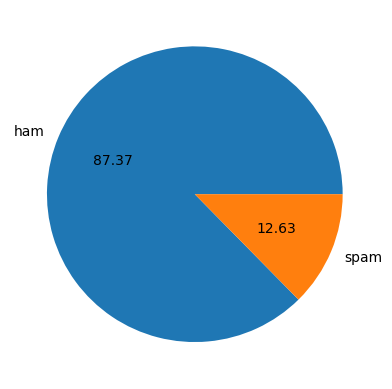

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [20]:
# Data is imbalanced

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters'] = df['email'].apply(len)

In [24]:
df.head()

,target,email,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61


In [25]:
# Fetch number of words
df['num_words'] = df['email'].apply(lambda x : len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,email,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,23
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15


In [27]:
df['num_sentences'] = df['email'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,email,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,23,2
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1


In [29]:
# Description for all emails
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [30]:
# Description for ham emails
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [31]:
# Description for spam emails
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

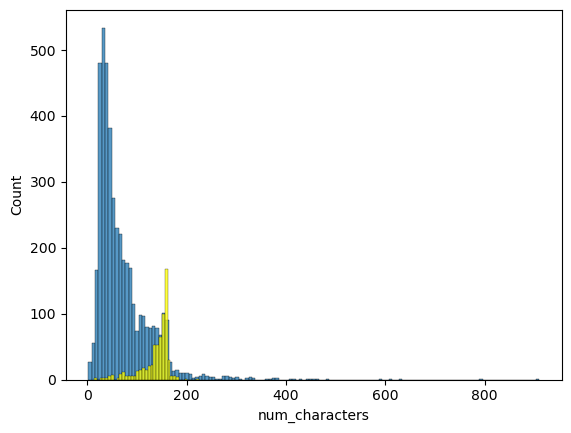

In [32]:
import seaborn as sns
# Blue Count -> Ham Emails
# Yellow Count -> Spam Emails
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='yellow')

<Axes: xlabel='num_words', ylabel='Count'>

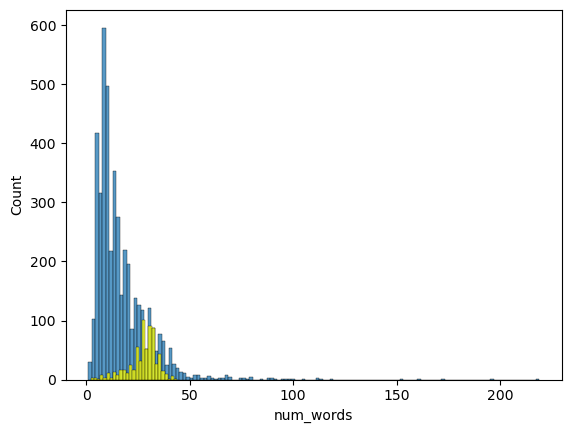

In [33]:
# Blue Count -> Ham Emails
# Yellow Count -> Spam Emails
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='yellow')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


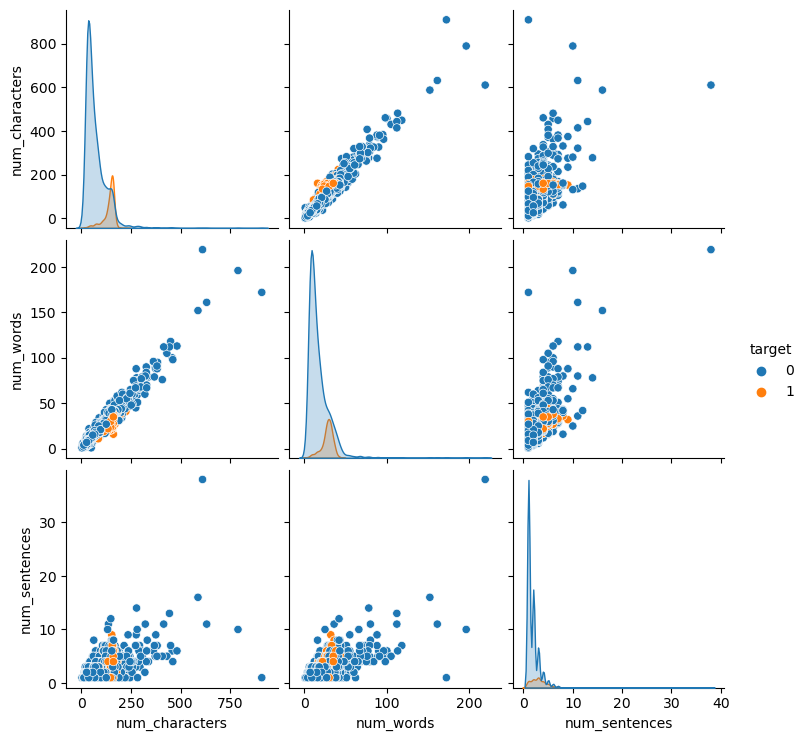

In [34]:
sns.pairplot(df, hue='target')

/tmp/ipykernel_32/1891949428.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

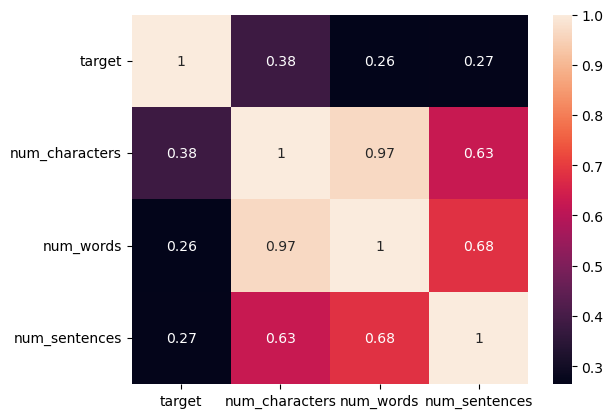

In [38]:
sns.heatmap(df.corr(), annot=True)
# From the below graph, we can conclude that there is high correlatin between num_char & num_words & num_sentences. 
# So, we cannot use all three columns, so we will be using only num_characters column.

## 3. Text Preprocessing
* Lower Case 
* Word Tokenization
* Remove special characters
* Remove Stop words and punctuation
* Data stemming


In [80]:
# Function to preprocess text, do word tokenizatin, remove special characters, and remove stop words, punctuation. 
def text_preprocesing(text): 
    text = text.lower()
    text = nltk.word_tokenize(text)
    temp = [] 
    for word in text: 
        if word.isalnum(): 
            temp.append(word)
    text = temp[:]
    temp.clear()
    for word in text: 
        if word not in stopwords and word not in punctuation:
            word = ps.stem(word)
            temp.append(word)
        
    return " ".join(temp)


In [73]:
# List of all the stop words. 
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [74]:
# List of all the punctuations
import string 
punctuation = string.punctuation

In [75]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [76]:
text_preprocesing('Hello How are you doing. my score is 60, I have been plaing football since morning %% ?')

['hello', 'score', '60', 'pla', 'footbal', 'sinc', 'morn']

In [81]:
df['preproc_text'] = df['email'].apply(text_preprocesing)

In [82]:
df.head()

,target,email,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences,preproc_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1,nah think goe usf live around though


In [84]:
# Generating Work Cloud. 
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

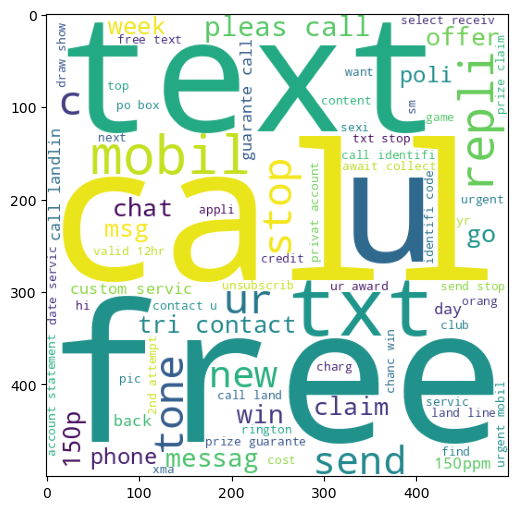

In [89]:
# Word Cloud for spam emails.
spam_wc = wc.generate(df[df['target'] == 1]['preproc_text'].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

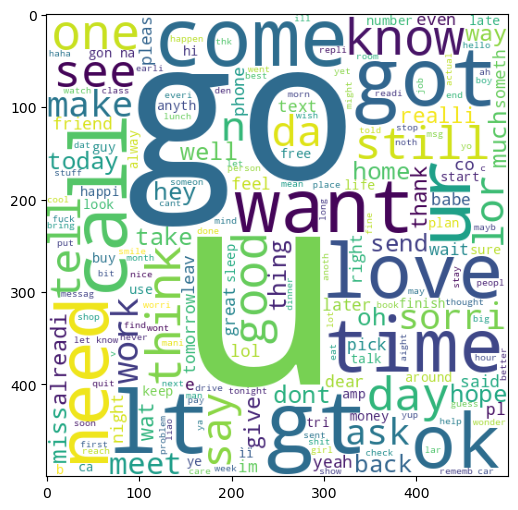

In [88]:
# Word Cloud for ham emails.
ham_wc = wc.generate(df[df['target'] == 0]['preproc_text'].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)

In [94]:
# Taking out the most common 30 words from spam emails.
spam_corpus = []; 
spam_sentences = df[df['target'] == 1]['preproc_text'].tolist()
for sentence in spam_sentences: 
    for word in sentence.split(): 
        spam_corpus.append(word)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, 'prize'),
  Text(12, 0, '4'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

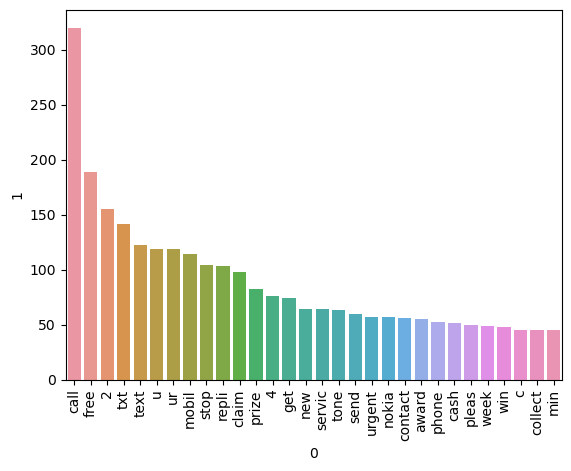

In [113]:
from collections import Counter
barplt_df = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(barplt_df, x = barplt_df[0], y = barplt_df[1])
plt.xticks(rotation='vertical')